In [14]:
# Harris Corner Detection
# Locate interest points where the surrounding neighborhood shows edges in more that one direction
# Construct a Harris matrix from the image gradient, which is an averaging of the gradient over
# neighboring pixels. There will be one Harris matrix for each point in the image. Averaging will cause the 
# eigenvalues of matrix will indicate whether there is a corner.

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import imtools
%matplotlib inline

from scipy.ndimage import filters

def compute_harris_response(img, sigma=3):
    """
    Returns a matrix with each pixel containing the value of the Harris Response
    """
    
    # Compute weight matrices (gaussians)
    img_x = np.zeros(img.shape)
    filters.gaussian_filter(img, (sigma,sigma), (0,1), img_x)
    img_y = np.zeros(img.shape)
    filters.gaussian_filter(img, (sigma,sigma), (1,0), img_y)
    
    # Compute Harris Matrix Components
    Wxx = filters.gaussian_filter(img_x*img_x,sigma)
    Wxy = filters.gaussian_filter(img_x*img_y,sigma)
    Wyy = filters.gaussian_filter(img_y*img_y,sigma)
    
    # Determinant and Trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx+Wyy
    
    return Wdet / Wtr
    
def get_harris_points(harris_img, min_dist=10, threshold=0.1):
    """ Return corners as points from a Harris response image
    min_dist is the minimum number of pixels separating
    corners and image boundary. """
    
    # find top corner candidates above a threshold
    corner_threshold = harris_img.max() * threshold
    harris_img_t = (harris_img > corner_threshold) * 1
    
    # Get coordinate candidates and their corners
    coords = np.array(harris_img_t.nonzero()).T
    candidate_values = [harris_img[c[0],c[1]] for c in coords]
    
    # Sort candidates
    index = np.argsort(candidate_values)
    
    # Store allowed point locations in array
    allowed_locations = np.zeros(harris_img.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1
    
    # select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0], coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist), 
                              (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
        
    return filtered_coords
    
def plot_harris_points(img, filtered_coordinates):
    plt.figure()
    plt.gray()
    plt.imshow(img)
    
    plt.plot([p[1] for p in filtered_coordinates], [p[0] for p in filtered_coordinates], 'o')
    plt.axis('off')
    plt.show()

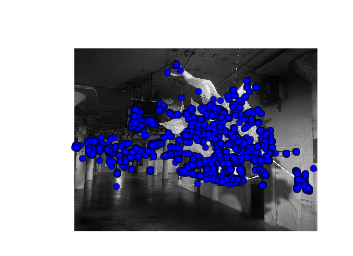

In [15]:
img = np.array(Image.open('images/at_large.jpg').convert('L'))
harris_img = compute_harris_response(img)
filtered_coords = get_harris_points(harris_img, 6)
plot_harris_points(img, filtered_coords)
